In [1]:

#this allows relative imports in notebook
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from UCLSE.message_environment import MarketSession, yamlLoad
import pandas as pd
from UCLSE.plotting_utilities import bid_ask_window,demand_curve_intersect, bid_ask_last_plot, display_func,plot_min_max_mean


%matplotlib inline

# Market_session

The Market_session class is the coordinator between traders, exchange and supply_demand modules. It sets up the experiment, runs it and records the information.

In [2]:
pa=module_path
config_name='UCLSE\\test\\fixtures\\mkt_cfg.yml'
config_path=os.path.join(pa,config_name)

environ_dic=yamlLoad(config_path)
environ_dic['trade_file']='avg_balance.csv'
environ_dic['trade_record']= 'transactions.csv'

The instantiation of the class requires multiple parameters. Most of them are recognisable from the previous tutorial on the supply_demand class. The new elements here include the buyers spec where the population of trading agents is defined.

In [3]:
	def schedule_offsetfn_wrapper(wavelength,gradient=0,amplitude=50):

		def schedule_offsetfn(t): #weird function that affects price as a function of t
			pi2 = np.pi * 2
			
			offset = gradient + amplitude * np.sin((pi2/wavelength) * t)
			ans=np.round(offset,0)

			return  ans

		return schedule_offsetfn

In [4]:
#simple sine wave for supply and demand intersection
f=schedule_offsetfn_wrapper(240,gradient=0,amplitude=50)

environ_dic={
'start_time': 0.0,
 'end_time': 600.0, #how long the experiment goes on for
 'supply_price_low': 80,
 'supply_price_high': 220,
 'demand_price_low': 80,
 'demand_price_high': 220,
 'interval':30 ,
 'timemode': 'drip-poisson',
 'buyers_spec': {'GVWY': 10, 'SHVR': 10, 'ZIC': 10, 'ZIP': 10}, #how many of each type of trader we want
 'sellers_spec': {'GVWY': 10, 'SHVR': 10, 'ZIC': 10, 'ZIP': 10},
 'verbose': False,
 'trade_file': 'avg_balance.csv', #profit and loss summary by trader type
 'trade_record': 'transactions.csv', #list of all transactions
 'dump_each_trade': True, 
  'trader_record': True,
    'offsetfn':f
        } #record each trade

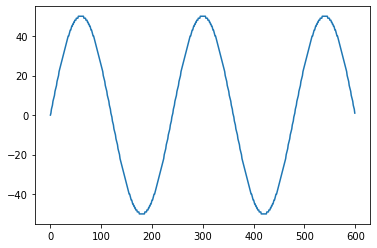

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(f(np.arange(0,600)))

Define Market_session object

In [6]:
sess=MarketSession(**environ_dic)
sess.sd.set_orders() #instruct the SD object to predefine orders
sess.set_traders_pick() #predefine the sequence that traders are requested for orders

It has an associated exchange

In [7]:
sess.exchange

No orders in exchange order book

Associated traders

In [8]:
sess.traders

{'B00': [TID: B00 type: GVWY balance: 0 blotter: {} orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B01': [TID: B01 type: GVWY balance: 0 blotter: {} orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B02': [TID: B02 type: GVWY balance: 0 blotter: {} orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B03': [TID: B03 type: GVWY balance: 0 blotter: {} orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B04': [TID: B04 type: GVWY balance: 0 blotter: {} orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B05': [TID: B05 type: GVWY balance: 0 blotter: {} orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B06': [TID: B06 type: GVWY balance: 0 blotter: {} orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B07': [TID: B07 type: GVWY balance: 0 blotter: {} orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B08': [TID: B08 type: GVWY balance: 0 blotter: {} orders: OrderedDict() n_trades: 0 profitpertime: 0],
 'B09': [TID: B09 type: GVWY balance: 0 blotter: {} ord

and associated supply and demand

In [9]:
self=sess.sd
print(f"no. buyers: {self.n_buyers}, no.sellers: {self.n_sellers}, timemode: {self.timemode},  supply schedule: {self.supply_schedule}, demand schedule {self.demand_schedule}")

no. buyers: 40, no.sellers: 40, timemode: drip-poisson,  supply schedule: [{'from': 0.0, 'to': 600.0, 'stepmode': 'fixed', 'ranges': (80, 220, <function schedule_offsetfn_wrapper.<locals>.schedule_offsetfn at 0x00000275AAE3F168>)}], demand schedule [{'from': 0.0, 'to': 600.0, 'stepmode': 'fixed', 'ranges': (80, 220, <function schedule_offsetfn_wrapper.<locals>.schedule_offsetfn at 0x00000275AAE3F168>)}]


In [10]:
sess.sd

no. buyers: 40, no.sellers: 40, timemode: drip-poisson,  supply schedule: [{'from': 0.0, 'to': 600.0, 'stepmode': 'fixed', 'ranges': (80, 220, <function schedule_offsetfn_wrapper.<locals>.schedule_offsetfn at 0x00000275AAE3F168>)}], demand schedule [{'from': 0.0, 'to': 600.0, 'stepmode': 'fixed', 'ranges': (80, 220, <function schedule_offsetfn_wrapper.<locals>.schedule_offsetfn at 0x00000275AAE3F168>)}]

The principle method is simulate() which runs the experiment and will save the profit and loss of the traders in a csv as well as the transaction record.

As can be seen, this is calls simulate_one_period method and increments the timer until time is up.

In [11]:
display_func('UCLSE.message_environment.MarketSession','simulate')

In [12]:
display_func('UCLSE.message_environment.MarketSession','simulate_one_period')

In [13]:
sess.simulate(recording=True,logging=True)

All transactions are stored at the exchange. Cancels occur when traders are issued more orders than their limit (default 1); the old one is cancelled and replaced by the new one.

In [14]:
sess.exchange.publish_tape(df=True,length=0)


,type,tape_time,tidx,tid,otype,price,qty,time,qid,oid,party1,party2,p1_qid,p2_qid
0,New Order,0.80,0,B08,Bid,109.0,1,0.80,0.0,-10.0,NaN,NaN,NaN,NaN
1,New Order,1.12,1,S30,Ask,250.0,1,1.12,1.0,-72.0,NaN,NaN,NaN,NaN
2,New Order,1.98,2,B07,Bid,107.0,1,1.98,2.0,-9.0,NaN,NaN,NaN,NaN
3,New Order,2.32,3,S39,Ask,247.0,1,2.32,3.0,-81.0,NaN,NaN,NaN,NaN
4,Cancel,2.53,4,S39,Ask,247.0,1,2.32,3.0,-81.0,NaN,NaN,NaN,NaN
5,New Order,2.53,5,S39,Ask,247.0,1,2.53,4.0,-81.0,NaN,NaN,NaN,NaN
6,New Order,2.66,6,S22,Ask,187.0,1,2.66,5.0,-64.0,NaN,NaN,NaN,NaN
7,Cancel,2.87,7,S30,Ask,250.0,1,1.12,1.0,-72.0,NaN,NaN,NaN,NaN
8,New Order,2.87,8,S30,Ask,219.0,1,2.87,6.0,-72.0,NaN,NaN,NaN,NaN
9,New Order,2.90,9,B05,Bid,101.0,1,2.90,7.0,-7.0,NaN,NaN,NaN,NaN


The state of the orderbook at the end of the period is:

In [15]:
sess.n_buyers

40

In [16]:
print(sess.exchange)

                              tid     
otype                         Ask  Bid
price time   qid   oid   qty          
89.0  599.73 27737 -1523 1    NaN  B01
96.0  599.94 27748 -1525 1    NaN  B03
106.0 599.04 27696 -1522 1    NaN  B00
108.0 599.82 27742 -1526 1    NaN  B04
113.0 599.74 27738 -1529 1    NaN  B07
115.0 599.66 27732 -1531 1    NaN  B09
118.0 599.72 27736 -1524 1    NaN  B02
120.0 599.86 27743 -1558 1    NaN  B36
127.0 599.58 27726 -1530 1    NaN  B08
128.0 598.68 27677 -1527 1    NaN  B05
129.0 599.62 27729 -1528 1    NaN  B06
131.0 599.57 27725 -1560 1    NaN  B38
132.0 598.45 27664 -1535 1    NaN  B13
133.0 599.64 27730 -1542 1    NaN  B20
137.0 599.71 27735 -1557 1    NaN  B35
139.0 599.10 27700 -1534 1    NaN  B12
143.0 599.37 27716 -1538 1    NaN  B16
148.0 599.11 27701 -1539 1    NaN  B17
149.0 599.27 27708 -1540 1    NaN  B18
155.0 599.75 27739 -1581 1    S19  NaN
187.0 599.43 27718 -1585 1    S23  NaN
189.0 599.53 27723 -1592 1    S30  NaN
196.0 599.50 27722 -1586 

We can look at the list of orders sent to the traders through this method

In [16]:
df=sess.create_order_list(sess)
df.tail()

,tid,otype,price,qty,qid,oid,time_issued
time,,,,,,,
1970-01-01 00:09:58.380,S08,Ask,111.0,1,None,-1570,598.38
1970-01-01 00:09:58.710,B24,Bid,168.0,1,None,-1546,598.71
1970-01-01 00:09:59.050,S31,Ask,192.0,1,None,-1593,599.05
1970-01-01 00:09:59.050,S38,Ask,217.0,1,None,-1600,599.05
1970-01-01 00:09:59.550,B04,Bid,95.0,1,None,-1526,599.55


We really want to know a bit more about these orders - when were they cancelled or completed if at all? We can get a fuller picture by examining the records of the individual traders. This method does not require the session to be recorded.

We can create supply and demand curves from the orders issued to traders as before, calculate their intersect and plot them. 

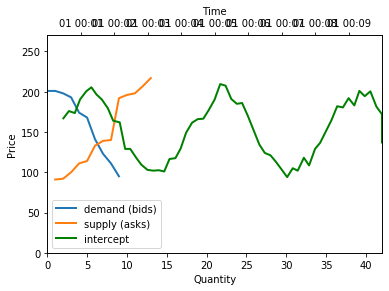

In [18]:
bids,asks,intersect=sess.bid_ask_window(df,periods=3000,step=10)
fig,h=demand_curve_intersect(bids,asks,intersect,df,path='basic_animation.mp4',window='30s')
h

We can also use the replay vars to plot how the best bid ask evolved and where transactions were relative to the supply demand curve.

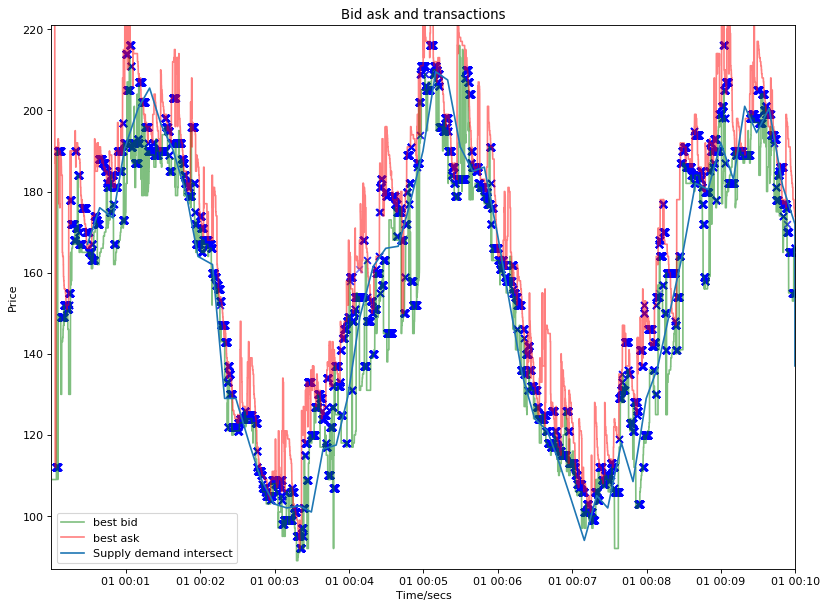

In [19]:
best_bid,best_ask,last_trans=sess.best_last(sess)
bid_ask_last_plot(best_bid,best_ask,last_trans,intersect)

We can also see how long a trade takes to be completed, measured from the time that a trader receives the instruction

In [19]:
order_list['waiting_time']=order_list.completion_time-order_list.index.values

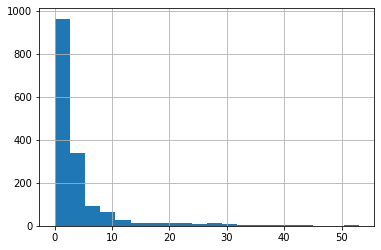

In [20]:
order_list['waiting_time'].astype('timedelta64[s]').hist(bins=20)